In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
data_train_path = 'Fruits_Vegetables/train'
data_test_test = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [44]:
img_width = 180
img_height = 180

In [45]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size = (img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [46]:
data_cat= data_train.class_names

In [47]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [48]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size = (img_width, img_height),
    batch_size=32,
    validation_split=False,
    shuffle=False
)

Found 351 files belonging to 36 classes.


In [49]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_test,
    shuffle=False,
    image_size = (img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


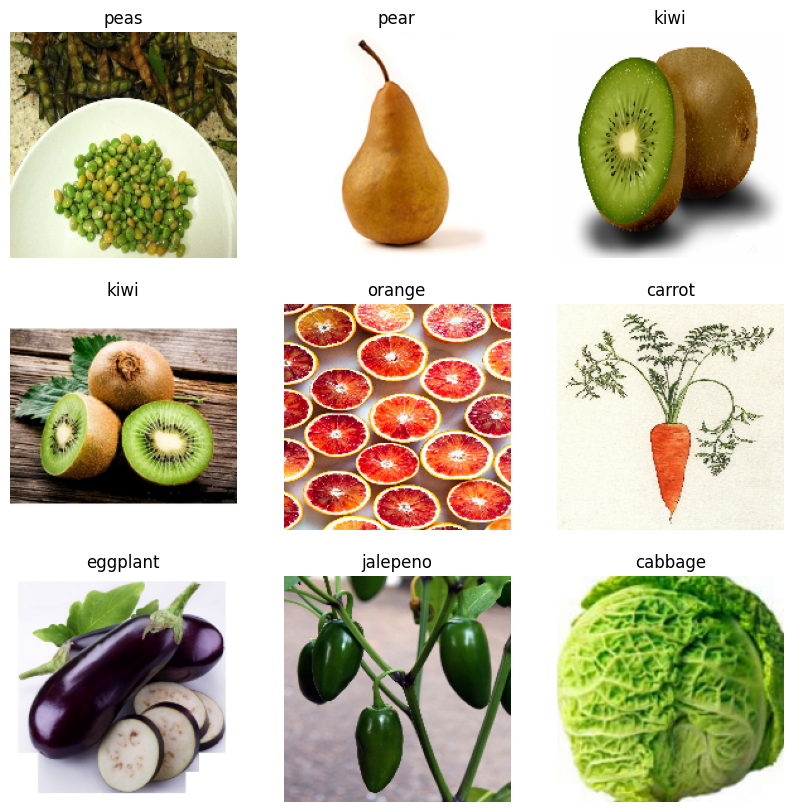

In [50]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

# Create a Model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [52]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [53]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [54]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [55]:
epochs = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs, batch_size=32, verbose=2)
model.summary()

Epoch 1/25


98/98 - 32s - loss: 3.2365 - accuracy: 0.1207 - val_loss: 2.2497 - val_accuracy: 0.3818 - 32s/epoch - 324ms/step
Epoch 2/25
98/98 - 31s - loss: 2.3429 - accuracy: 0.3268 - val_loss: 1.5466 - val_accuracy: 0.5783 - 31s/epoch - 316ms/step
Epoch 3/25
98/98 - 30s - loss: 1.6995 - accuracy: 0.5043 - val_loss: 0.7727 - val_accuracy: 0.8091 - 30s/epoch - 306ms/step
Epoch 4/25
98/98 - 31s - loss: 1.0753 - accuracy: 0.6864 - val_loss: 0.6068 - val_accuracy: 0.8718 - 31s/epoch - 318ms/step
Epoch 5/25
98/98 - 30s - loss: 0.5576 - accuracy: 0.8469 - val_loss: 0.4398 - val_accuracy: 0.9117 - 30s/epoch - 309ms/step
Epoch 6/25
98/98 - 30s - loss: 0.3137 - accuracy: 0.9191 - val_loss: 0.4497 - val_accuracy: 0.9459 - 30s/epoch - 306ms/step
Epoch 7/25
98/98 - 30s - loss: 0.2295 - accuracy: 0.9474 - val_loss: 0.3362 - val_accuracy: 0.9544 - 30s/epoch - 306ms/step
Epoch 8/25
98/98 - 31s - loss: 0.1601 - accuracy: 0.9698 - val_loss: 0.3973 - val_accuracy: 0.9516 - 31s/epoch - 312ms/step
Epoch 9/25
98/98 - 

# Predict Value of Model

Text(0.5, 1.0, 'Loss')

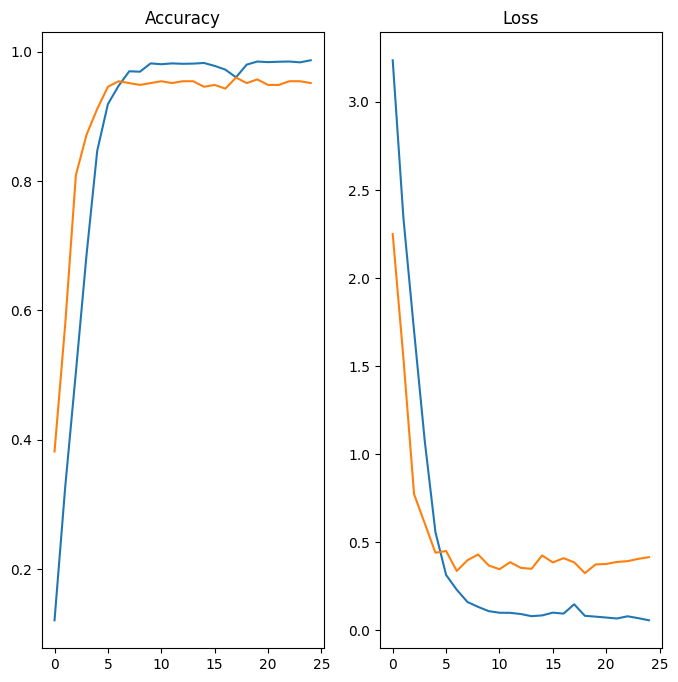

In [58]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training accuracy')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation loss')
plt.title('Loss')

In [59]:
image = 'banana.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [ ]:
predict = model.predict(img_bat)

In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print("Vegitable/Fruit in image is {} with accuracy of {.4}".format(data_cat[np.argmax(score)],np.max(score)*100))

# Save a model

In [ ]:
model.save('Image_Classification.keras')